![penguinni_logo](default.png)
___

##### import libraries

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#visualizations
#!pip install wordcloud
from wordcloud import WordCloud
from pylab import *

# Step 4 - Exploratory Data Analysis
    a) Importing data
        - corpus_df
    
    b) N-Grams for Penguinni Reviews

### a) Importing data

In [14]:
#import amazon_corpus_data.csv file
corpus_df = pd.read_csv("penguinni_corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head(3)

(1, 1)


,reviews
0,would like state cup made older kid actual sta...


##### Check for NaN Values in corpus_df

In [15]:
is_NaN = corpus_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [reviews]
Index: []


In [16]:
corpus_df = corpus_df.dropna()
print(corpus_df.isna().sum())

reviews    0
dtype: int64


### b) N-Grams for Reviews

In [17]:
#entire corpus series into seperate strings
corpus_series = corpus_df['reviews'].apply(lambda x: str(x))


print(len(corpus_series))
corpus_series

1


0    would like state cup made older kid actual sta...
Name: reviews, dtype: object

##### Review Unigrams

In [18]:
#getting unigrams  
vectorizer = CountVectorizer() 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for unigrams
vectorizer = TfidfVectorizer() 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
uni_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
uni_words = (uni_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", uni_words.head(60)) 



Words : 
              term      rank
135           cup  0.662602
721         state  0.327739
392           lid  0.299240
406          love  0.178119
792           top  0.160307
265           get  0.142495
188          easy  0.131808
285         great  0.124683
680         sippy  0.113996
836           use  0.099747
382          leak  0.096184
503           old  0.096184
505           one  0.089059
95          clean  0.089059
786       toddler  0.085497
394          like  0.081935
581           put  0.078372
572         proof  0.074810
718     stainless  0.074810
570       product  0.067685
449         month  0.067685
887         would  0.067685
399        little  0.067685
276          good  0.060560
19           also  0.056998
707         spill  0.056998
366           kid  0.053436
891          year  0.053436
544       plastic  0.053436
859         water  0.053436
520            oz  0.049873
692         small  0.049873
725         steel  0.046311
610   replacement  0.046311
56      

##### Review Bigrams

In [19]:
#getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for bigrams
vectorizer = TfidfVectorizer(ngram_range =(2, 2)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
bi_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
bi_words = (bi_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", bi_words.head(60)) 



Words : 
                    term      rank
1930          sippy cup  0.334712
602          easy clean  0.244597
2047    stainless steel  0.167356
2068        state great  0.154482
1376          month old  0.154482
2564           year old  0.141609
888           great cup  0.141609
1098         leak proof  0.141609
2116          steel cup  0.102988
387             cup lid  0.102988
2018        spill proof  0.090115
1256           love cup  0.090115
2144     stuck together  0.077241
393            cup love  0.077241
1135            lid dry  0.077241
1515         one person  0.077241
2083          state one  0.077241
1307          make sure  0.077241
1229         little one  0.064368
2056         state best  0.064368
2159           sure lid  0.064368
1485           old love  0.064368
2153         super easy  0.064368
1281     love stainless  0.064368
1681      product state  0.064368
1721            put lid  0.064368
536     dishwasher safe  0.051494
1141            lid fit  0.051494
36

##### Review Trigrams

In [20]:
#getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names())  

#applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray())  
  
#getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
tri_ranking = pd.DataFrame(data1, columns = ['term','rank']) 
tri_words = (tri_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", tri_words.head(60)) 



Words head : 
                            term      rank
2355        stainless steel cup  0.139665
2418           state one person  0.104749
2509               sure lid dry  0.087290
1509              make sure lid  0.087290
2392            state great cup  0.087290
491          cup stuck together  0.069832
138              best sippy cup  0.052374
1298                lid dry put  0.052374
1584             month old love  0.052374
2220             sippy cup love  0.052374
1383             like sippy cup  0.052374
1033            great sippy cup  0.034916
2048    recommend product state  0.034916
434              cup little one  0.034916
2458           steel cup sleeve  0.034916
2617         together get apart  0.034916
1804               part cup lid  0.034916
2371             state best cup  0.034916
2372           state best sippy  0.034916
2376            state cup stuck  0.034916
2501           super easy clean  0.034916
2439            state well made  0.034916
2926         woul

##### Review Unigrams - Visualization

In [22]:
print(corpus_df.head())
corpus_all = ' '.join(corpus_df['reviews'])

                                             reviews
0  would like state cup made older kid actual sta...


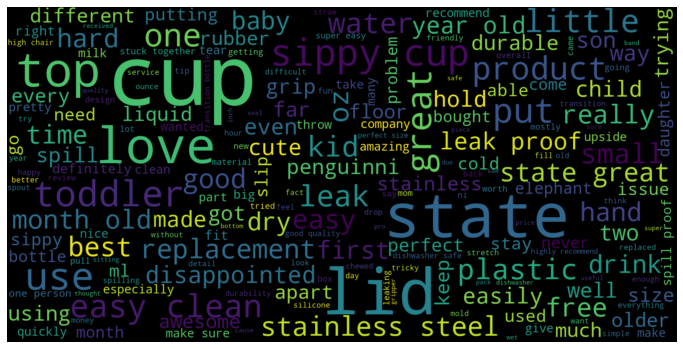

In [23]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(corpus_all)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 50 words')

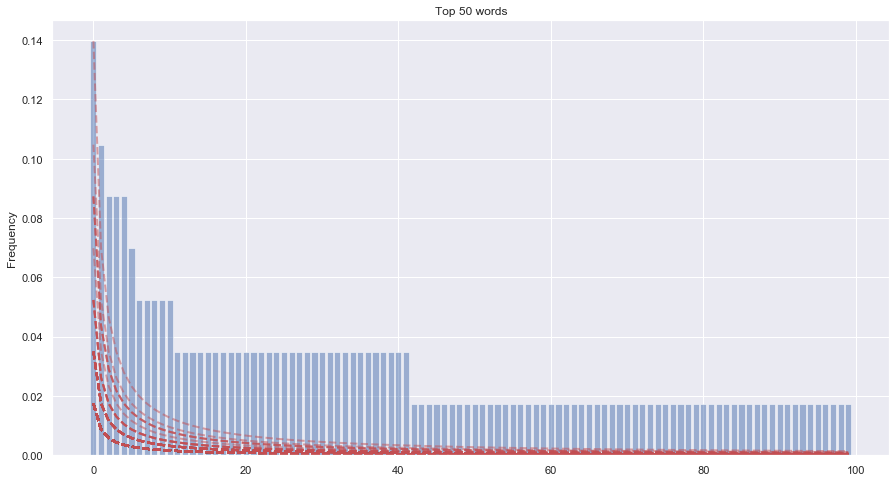

In [29]:
y_pos = np.arange(100)
plt.figure(figsize=(15,8))
s = 1
expected_zipf = [tri_ranking.sort_values(by='rank', ascending=False)['rank']/(i+1)**s for i in y_pos]
plt.bar(y_pos, tri_ranking.sort_values(by='rank', ascending=False)['rank'][:100], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 50 words')

### End of Step 4